In [1]:
from copy import deepcopy

import seaborn as sns
import matplotlib.pyplot as plt
import numpy.typing as npt

from sklearn.base import BaseEstimator
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    mean_squared_error,
    mean_absolute_percentage_error)
from sklearn.preprocessing import OrdinalEncoder

**Comparazione tra diversi classificatori**

In questa esercitazione, compareremo le performance di diversi classificatori sul dataset Iris.

Per iniziare, definiamo la procedura `show_results`, che ci permette di mostrare a schermo il report di classificazione e la matrice di confusione ottenuta dall'algoritmo sui valori di test.

In [2]:
def show_results(
        clf: BaseEstimator,
        X_train: npt.ArrayLike,
        X_test: npt.ArrayLike,
        y_train: npt.ArrayLike,
        y_test: npt.ArrayLike) -> None:
    """ Utility per stampare i risultati di classificazione.

    Argomenti:
        clf: algoritmo di classificazione da testare
        X_train: campioni di training
        X_test: campioni di testing
        y_train: label di training
        y_test: label di testing
    """
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()

Creiamo i dataset di training e di testing usando il metodo [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), e valutiamo ogni singolo metodo.

In [3]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      0.82      0.82        17
           2       0.75      0.75      0.75        12

    accuracy                           0.84        38
   macro avg       0.86      0.86      0.86        38
weighted avg       0.84      0.84      0.84        38



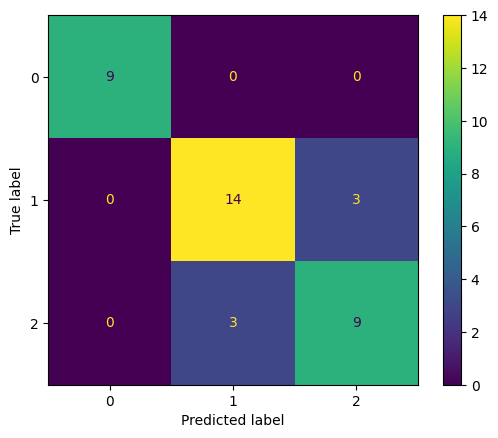

In [4]:
show_results(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      0.88      0.86        17
           2       0.82      0.75      0.78        12

    accuracy                           0.87        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.87      0.87      0.87        38



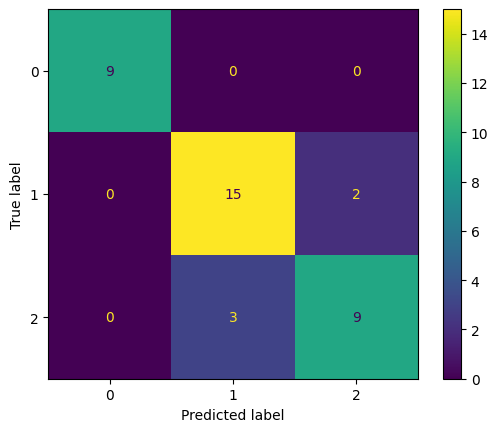

In [5]:
show_results(RandomForestClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.82      0.90        17
           2       0.80      1.00      0.89        12

    accuracy                           0.92        38
   macro avg       0.93      0.94      0.93        38
weighted avg       0.94      0.92      0.92        38



c:\Users\acard\.virtualenvs\pcs-exercises-4jw-2ggn\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


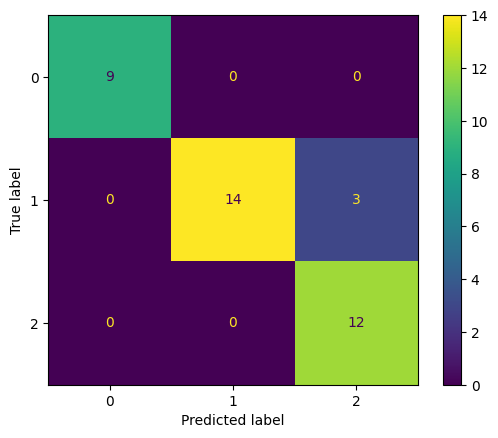

In [6]:
show_results(MLPClassifier(), X_train, X_test, y_train, y_test)

I risultati sono comparabili (ed egualmente soddisfacenti) per ciascuno degli algoritmi considerati. Di conseguenza, in casi così semplici, ognuno degli algoritmi considerati può essere utilizzato con efficacia, e la scelta dovrebbe ricadere sul meno complesso dal punto di vista computazionale che, in questo caso specifico, è plausibilmente l'albero decisionale.

Proviamo adesso ad utilizzare un albero decisionale come regressore, agendo sempre sul dataset Tips.

In [7]:
tips = sns.load_dataset('tips')

Proviamo ad usare il classificatore come regressore, andando ad utilizzare la variabile `total_bill` come variabile di regressione. Utilizziamo inoltre un `OrdinalEncoder` per codificare i valori categorici presenti nel dataset.

In [8]:
tips_rgr = deepcopy(tips)
y = tips_rgr.pop('total_bill')
X = tips_rgr.values
enc = OrdinalEncoder()
X = enc.fit_transform(X)

Calcoliamo quindi l'MSE ottenuto dal regressore sugli ultimi dieci campioni.

In [9]:
rgr = DecisionTreeRegressor()
rgr.fit(X[:-10], y[:-10])
y_pred = rgr.predict(X[-10:])

mean_squared_error(y[-10:], y_pred)

98.33214

In [10]:
def print_pred(est, X, y, random_state=42):
    X, y = load_diabetes(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    est.fit(X_train, y_train)
    y_pred = est.predict(X_test)
    print(f'MSE: {round(mean_squared_error(y_test, y_pred), 2)}')
    print(f'MAPE: {round(mean_absolute_percentage_error(y_test, y_pred), 2)}')    

In [11]:
print_pred(DecisionTreeRegressor(), X, y)

MSE: 5983.73
MAPE: 0.52


In [12]:
print_pred(RandomForestRegressor(), X, y)

MSE: 2861.56
MAPE: 0.39


In [13]:
print_pred(MLPRegressor(max_iter=100), X, y)

MSE: 25436.98
MAPE: 0.96


c:\Users\acard\.virtualenvs\pcs-exercises-4jw-2ggn\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
print_pred(MLPRegressor(max_iter=1000), X, y)

MSE: 3226.93
MAPE: 0.44


c:\Users\acard\.virtualenvs\pcs-exercises-4jw-2ggn\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
X, y = load_diabetes(return_X_y=True)
X.shape

(442, 10)